#기계학습 입문 2023-2 중간 프로젝트 코드
#### 주제: Breast Cancer Wisconsin (Diagnostic) Data Set 분석
##### 목표: 유방암 악성 판단에 유의한 변수 파악하기
##### 데이터 개수는 적더라도 변수가 많은 데이터를 활용

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.


##데이터 불러오기

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/drive/MyDrive/data.csv')

In [67]:
from google.colab.data_table import DataTable
DataTable.max_columns = 40

In [68]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###결측치 확인 및 기술 통계

In [69]:
pd.isnull(data).sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [70]:
#데이터 크기 출력
print(data.shape)
#데이터 크기는 비록 569로 작지만 독립변수로 활용가능한 변수가 33개로 매우 많음

(569, 33)


In [71]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [72]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [73]:
malignant=data[data["diagnosis"]=="M"]
benign=data[data["diagnosis"]=="B"]

In [74]:
malignant.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,0.0
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,NaN
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,NaN
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,NaN
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,NaN
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,NaN
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,NaN


In [75]:
benign.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,0.0
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,NaN
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,NaN
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,NaN
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,NaN
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,NaN
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,NaN


##EDA 분석(데이터 시각화)

In [79]:
print(diagnosis_count)

B    357
M    212
Name: diagnosis, dtype: int64


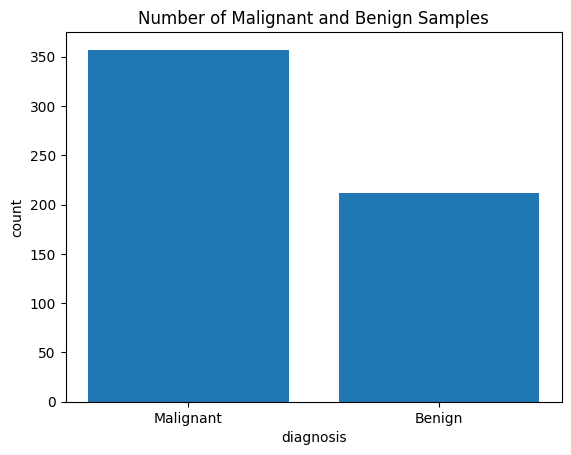

In [113]:
#diagnosis 변수에서 M과 B의 비율 시각화
import matplotlib.pyplot as plt

diagnosis_count = data['diagnosis'].value_counts()
catagories=["Malignant","Benign"]
# 막대 그래프 생성

plt.bar(catagories,diagnosis_count)
plt.xlabel('diagnosis')
plt.ylabel('count')
plt.title("Number of Malignant and Benign Samples")
# 그래프 출력
plt.show()

<ipython-input-78-b9e54b0da106>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)


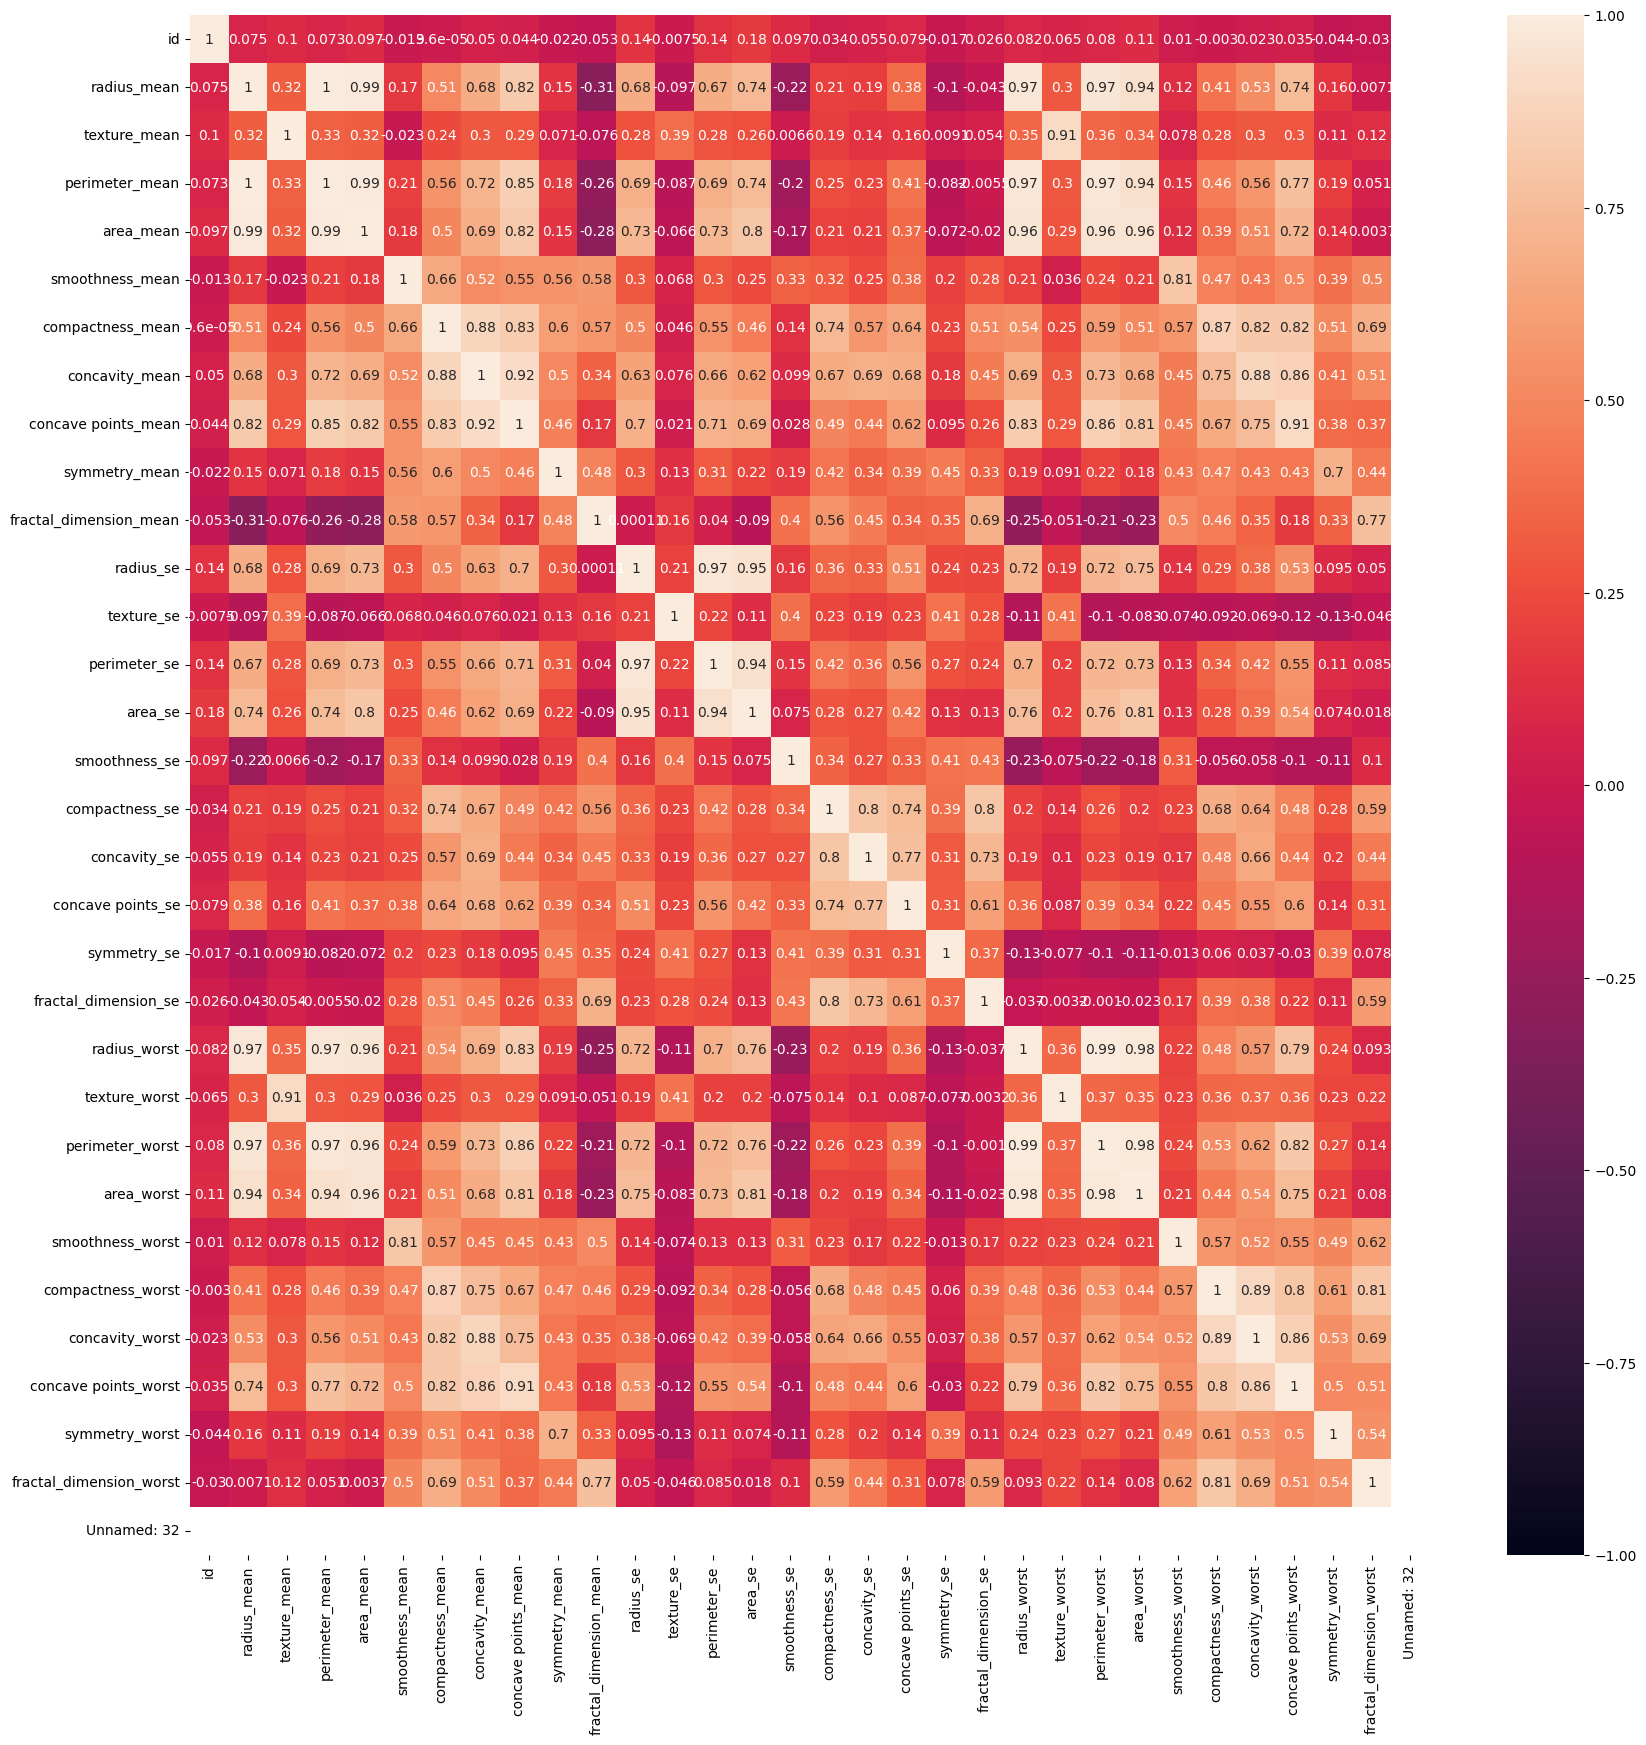

In [78]:
#HEATMAP
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
plt.figure(figsize =(20,20))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

##머신러닝 준비
### 학습 데이터 및 테스트 데이터 준비

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
#dianosis데이터의 범주를 0과1로 수치화
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [82]:
#종속변수를 target에 넘파이로 저장
target=data['diagnosis'].to_numpy()

In [83]:
#이후 특성 중요도를 변수를 찾기위한 데이터프레임 남겨두기 위한 코드
train_data=data.iloc[:,2:-1]

#활용가능한 독립변수만 data에 numpy형태로 저장(id, diagnosis, Unnamed:32 변수 제거)
data=data.iloc[:,2:-1].to_numpy()

In [84]:
#데이터를 8:2의 비율로 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

# 특성 표준화
scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
test_input = scaler.transform(test_input)

In [85]:
train_input

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [86]:
test_input

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

###KNN

In [176]:
from sklearn.model_selection import GridSearchCV #어떤 파라미터가 최적일지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

kn=KNeighborsClassifier()

hyper_parmas = {'n_neighbors' : list(range(1,20))}

grid_kn_model = GridSearchCV(kn, param_grid=hyper_parmas, cv=5, refit=True, return_train_score=True)
grid_kn_model.fit(train_input, train_target)

best_kn_model = grid_kn_model.best_estimator_ #최적의 모델
train_accuracy = best_kn_model.score(train_input, train_target)
test_accuracy = best_kn_model.score(test_input, test_target)

# 교차 검증을 통한 정확도 평균 계산
cv_scores = cross_val_score(best_kn_model, train_input, train_target, cv=5)
cv_accuracy_mean = cv_scores.mean()

# 최적의 파라미터
best_params = grid_kn_model.best_params_

# 결과 출력
print(f"학습 세트 정확도: {train_accuracy:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"교차 검증 정확도 평균: {cv_accuracy_mean:.4f}")
print(f"최적의 파라미터: {best_params}")

학습 세트 정확도: 0.9802
테스트 세트 정확도: 0.9474
교차 검증 정확도 평균: 0.9604
최적의 파라미터: {'n_neighbors': 5}


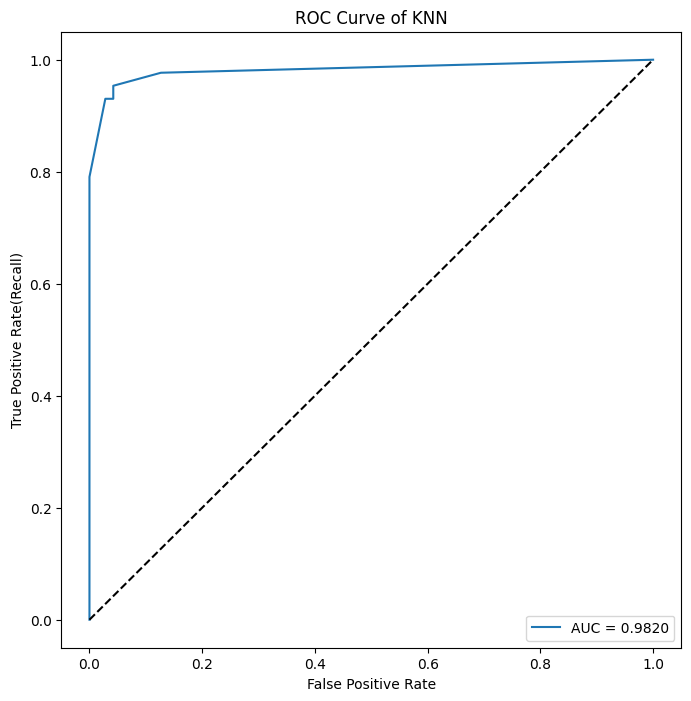

In [177]:
# auc
y_scores = best_kn_model.predict_proba(test_input)[:, 1]
fpr, tpr, thresholds = roc_curve(test_target, y_scores)
roc_auc = roc_auc_score(test_target, y_scores)

# roc 곡선 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('ROC Curve of KNN')
plt.legend(loc='lower right')
plt.show()

In [178]:
# 예측값 생성
train_pred = best_kn_model.predict(train_input)
test_pred = best_kn_model.predict(test_input)

# True Positive, True Negative, False Positive, False Negative 계산
def calculate_confusion_matrix(true, pred):
    true_positive = sum((true == 1) & (pred == 1))
    true_negative = sum((true == 0) & (pred == 0))
    false_positive = sum((true == 0) & (pred == 1))
    false_negative = sum((true == 1) & (pred == 0))
    return true_positive, true_negative, false_positive, false_negative

# 훈련 세트에 적용
train_tp, train_tn, train_fp, train_fn = calculate_confusion_matrix(train_target, train_pred)

# 테스트 세트에 적용
test_tp, test_tn, test_fp, test_fn = calculate_confusion_matrix(test_target, test_pred)

# 민감도(recall), 특이도, 정밀도, 정확도, F1 Score 계산
sensitivity_train = train_tp / (train_tp + train_fn)
specificity_train = train_tn / (train_tn + train_fp)
precision_train = train_tp / (train_tp + train_fp)
accuracy_train = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
f1_train = (2 * precision_train * sensitivity_train) / (precision_train + sensitivity_train)

sensitivity_test = test_tp / (test_tp + test_fn)
specificity_test = test_tn / (test_tn + test_fp)
precision_test = test_tp / (test_tp + test_fp)
accuracy_test = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
f1_test = (2 * precision_test * sensitivity_test) / (precision_test + sensitivity_test)

# 결과 출력
print(f"훈련 세트 - 민감도: {sensitivity_train:.3f}, 특이도: {specificity_train:.3f}, 정밀도: {precision_train:.3f}, 정확도: {accuracy_train:.3f}, F1 Score: {f1_train:.3f}")
print(f"테스트 세트 - 민감도: {sensitivity_test:.3f}, 특이도: {specificity_test:.3f}, 정밀도: {precision_test:.3f}, 정확도: {accuracy_test:.3f}, F1 Score: {f1_test:.3f}")

훈련 세트 - 민감도: 0.947, 특이도: 1.000, 정밀도: 1.000, 정확도: 0.980, F1 Score: 0.973
테스트 세트 - 민감도: 0.930, 특이도: 0.958, 정밀도: 0.930, 정확도: 0.947, F1 Score: 0.930


##Random Forest(RF)

In [179]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
random_forest = RandomForestClassifier(random_state=42)

# 그리드 서치를 사용하여 최적의 파라미터 찾기
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
}
grid_rf_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_rf_search.fit(train_input, train_target)

# 최적의 모델을 사용하여 예측
best_rf_model = grid_rf_search.best_estimator_
train_accuracy = best_rf_model.score(train_input, train_target)
test_accuracy = best_rf_model.score(test_input, test_target)

# 교차 검증을 통한 정확도 평균 계산
cv_scores = cross_val_score(best_rf_model, train_input, train_target, cv=5)
cv_accuracy_mean = cv_scores.mean()

# 최적의 파라미터
best_params = grid_rf_search.best_params_

# 특성 중요도
feature_importances = best_rf_model.feature_importances_

# 결과 출력
print(f"학습 세트 정확도: {train_accuracy:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"교차 검증 정확도 평균: {cv_accuracy_mean:.4f}")
print(f"최적의 파라미터: {best_params}")
print(f"특성 중요도: {feature_importances}")

학습 세트 정확도: 0.9978
테스트 세트 정확도: 0.9649
교차 검증 정확도 평균: 0.9626
최적의 파라미터: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
특성 중요도: [0.05189745 0.0155031  0.039117   0.04330395 0.00768756 0.0149336
 0.05481094 0.11860778 0.00318762 0.00482935 0.01665718 0.00474274
 0.00729474 0.0228836  0.00467544 0.00483599 0.0093736  0.00411644
 0.00470347 0.00534087 0.06815243 0.02060568 0.12669601 0.13004293
 0.01317445 0.01744552 0.04080035 0.12961699 0.0088803  0.0060829 ]


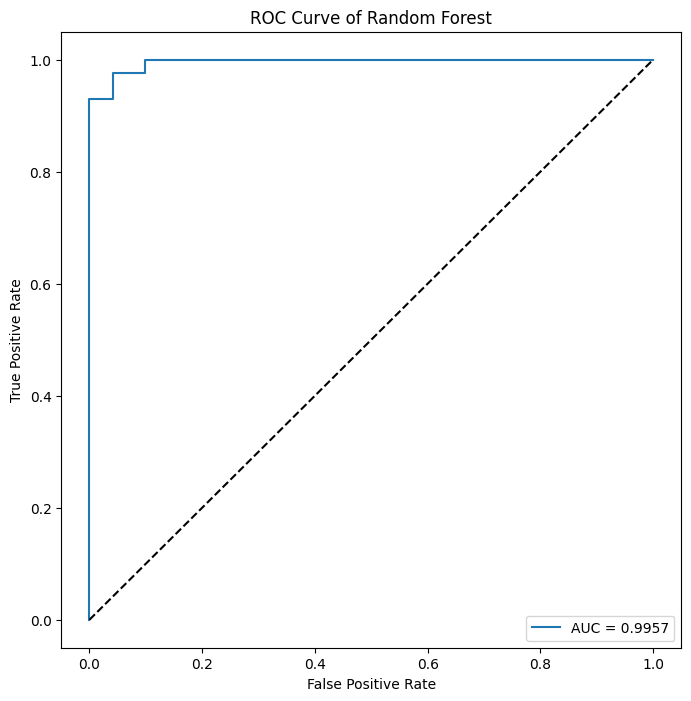

In [180]:
# AUC
y_scores = best_rf_model.predict_proba(test_input)[:, 1]
fpr, tpr, thresholds = roc_curve(test_target, y_scores)
roc_auc = roc_auc_score(test_target, y_scores)

# ROC 곡선 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend(loc='lower right')
plt.show()

In [181]:
# 각 특성의 중요도를 기준으로 내림차순 정렬하여 상위 5개의 특성을 선택
top_features_indices = feature_importances.argsort()[::-1][:5]

# 상위 5개 특성의 이름 출력
top_features_names = train_data.columns[top_features_indices]
print("상위 5개의 중요한 특성:")
for feature_name in top_features_names:
    print(feature_name)

상위 5개의 중요한 특성:
area_worst
concave points_worst
perimeter_worst
concave points_mean
radius_worst


In [182]:
# 예측값 생성
train_pred = best_rf_model.predict(train_input)
test_pred = best_rf_model.predict(test_input)

# True Positive, True Negative, False Positive, False Negative 계산
def calculate_confusion_matrix(true, pred):
    true_positive = sum((true == 1) & (pred == 1))
    true_negative = sum((true == 0) & (pred == 0))
    false_positive = sum((true == 0) & (pred == 1))
    false_negative = sum((true == 1) & (pred == 0))
    return true_positive, true_negative, false_positive, false_negative

# 훈련 세트에 적용
train_tp, train_tn, train_fp, train_fn = calculate_confusion_matrix(train_target, train_pred)

# 테스트 세트에 적용
test_tp, test_tn, test_fp, test_fn = calculate_confusion_matrix(test_target, test_pred)

# 민감도(recall), 특이도, 정밀도, 정확도, F1 Score 계산
sensitivity_train = train_tp / (train_tp + train_fn)
specificity_train = train_tn / (train_tn + train_fp)
precision_train = train_tp / (train_tp + train_fp)
accuracy_train = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
f1_train = (2 * precision_train * sensitivity_train) / (precision_train + sensitivity_train)

sensitivity_test = test_tp / (test_tp + test_fn)
specificity_test = test_tn / (test_tn + test_fp)
precision_test = test_tp / (test_tp + test_fp)
accuracy_test = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
f1_test = (2 * precision_test * sensitivity_test) / (precision_test + sensitivity_test)

# 결과 출력
print(f"훈련 세트 - 민감도: {sensitivity_train:.3f}, 특이도: {specificity_train:.3f}, 정밀도: {precision_train:.3f}, 정확도: {accuracy_train:.3f}, F1 Score: {f1_train:.3f}")
print(f"테스트 세트 - 민감도: {sensitivity_test:.3f}, 특이도: {specificity_test:.3f}, 정밀도: {precision_test:.3f}, 정확도: {accuracy_test:.3f}, F1 Score: {f1_test:.3f}")

훈련 세트 - 민감도: 0.994, 특이도: 1.000, 정밀도: 1.000, 정확도: 0.998, F1 Score: 0.997
테스트 세트 - 민감도: 0.930, 특이도: 0.986, 정밀도: 0.976, 정확도: 0.965, F1 Score: 0.952


##SVM

In [183]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_val_score

svm_classifier = svm.SVC(kernel='linear', probability=True)

svm_params={'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svm_search = GridSearchCV(svm_classifier, svm_params, cv=5)
grid_svm_search.fit(train_input, train_target)

# 최적의 모델을 사용하여 예측
best_svm_model = grid_svm_search.best_estimator_
train_accuracy = best_svm_model.score(train_input, train_target)
test_accuracy = best_svm_model.score(test_input, test_target)

# 교차 검증을 통한 정확도 평균 계산
cv_scores = cross_val_score(best_svm_model, train_input, train_target, cv=5)
cv_accuracy_mean = cv_scores.mean()

# 최적의 파라미터
best_params = grid_svm_search.best_params_

# 특성 중요도
feature_importances = abs(best_svm_model.coef_)

# 결과 출력
print(f"학습 세트 정확도: {train_accuracy:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"교차 검증 정확도 평균: {cv_accuracy_mean:.4f}")
print(f"최적의 파라미터: {best_params}")
print(f"특성 중요도: {feature_importances}")

학습 세트 정확도: 0.9824
테스트 세트 정확도: 0.9825
교차 검증 정확도 평균: 0.9736
최적의 파라미터: {'C': 0.1}
특성 중요도: [[0.25050131 0.25691054 0.24131386 0.25715137 0.01610042 0.10965512
  0.35799115 0.43443737 0.0521199  0.06613427 0.35416451 0.15425689
  0.25531342 0.27650474 0.14452737 0.27658271 0.03267606 0.08275639
  0.150649   0.16613849 0.34638029 0.53236301 0.29276619 0.31815925
  0.27205806 0.04112139 0.2854253  0.27311009 0.46845113 0.13368631]]


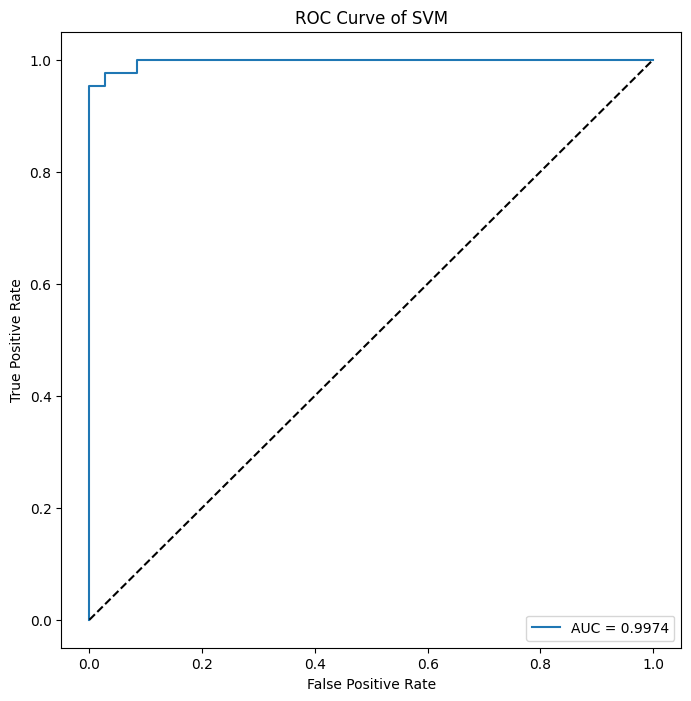

In [184]:
# ROC 커브 시각화
y_scores = best_svm_model.predict_proba(test_input)[:, 1]
fpr, tpr, thresholds = roc_curve(test_target, y_scores)
roc_auc = roc_auc_score(test_target, y_scores)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM')
plt.legend(loc='lower right')
plt.show()

In [185]:
# 중요도 기준으로 내림차순 정렬하여 상위 5개 특성 선택
feature_importances=feature_importances[0]
top_features_indices = feature_importances.argsort()[::-1][:5]

# 상위 5개 특성의 이름 출력
top_features_names = train_data.columns[top_features_indices]
print("상위 5개의 중요한 특성:")
for feature_name in top_features_names:
    print(feature_name)

상위 5개의 중요한 특성:
texture_worst
symmetry_worst
concave points_mean
concavity_mean
radius_se


In [186]:
# 예측값 생성
train_pred = best_svm_model.predict(train_input)
test_pred = best_svm_model.predict(test_input)

# True Positive, True Negative, False Positive, False Negative 계산
def calculate_confusion_matrix(true, pred):
    true_positive = sum((true == 1) & (pred == 1))
    true_negative = sum((true == 0) & (pred == 0))
    false_positive = sum((true == 0) & (pred == 1))
    false_negative = sum((true == 1) & (pred == 0))
    return true_positive, true_negative, false_positive, false_negative

# 훈련 세트에 적용
train_tp, train_tn, train_fp, train_fn = calculate_confusion_matrix(train_target, train_pred)

# 테스트 세트에 적용
test_tp, test_tn, test_fp, test_fn = calculate_confusion_matrix(test_target, test_pred)

# 민감도(recall), 특이도, 정밀도, 정확도, F1 Score 계산
sensitivity_train = train_tp / (train_tp + train_fn)
specificity_train = train_tn / (train_tn + train_fp)
precision_train = train_tp / (train_tp + train_fp)
accuracy_train = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
f1_train = (2 * precision_train * sensitivity_train) / (precision_train + sensitivity_train)

sensitivity_test = test_tp / (test_tp + test_fn)
specificity_test = test_tn / (test_tn + test_fp)
precision_test = test_tp / (test_tp + test_fp)
accuracy_test = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
f1_test = (2 * precision_test * sensitivity_test) / (precision_test + sensitivity_test)

# 결과 출력
print(f"훈련 세트 - 민감도: {sensitivity_train:.3f}, 특이도: {specificity_train:.3f}, 정밀도: {precision_train:.3f}, 정확도: {accuracy_train:.3f}, F1 Score: {f1_train:.3f}")
print(f"테스트 세트 - 민감도: {sensitivity_test:.3f}, 특이도: {specificity_test:.3f}, 정밀도: {precision_test:.3f}, 정확도: {accuracy_test:.3f}, F1 Score: {f1_test:.3f}")

훈련 세트 - 민감도: 0.964, 특이도: 0.993, 정밀도: 0.988, 정확도: 0.982, F1 Score: 0.976
테스트 세트 - 민감도: 0.953, 특이도: 1.000, 정밀도: 1.000, 정확도: 0.982, F1 Score: 0.976


##Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 로지스틱 회귀 모델 생성
logistic_regression = LogisticRegression(max_iter=1000)

# 그리드 서치를 사용하여 최적의 파라미터 찾기
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_lr_search.fit(train_input, train_target)

# 최적의 모델을 사용하여 예측
best_lr_model = grid_lr_search.best_estimator_
train_accuracy = best_lr_model.score(train_input, train_target)
test_accuracy = best_lr_model.score(test_input, test_target)

# 교차 검증을 통한 정확도 평균 계산
cv_scores = cross_val_score(best_lr_model, train_input, train_target, cv=5)
cv_accuracy_mean = cv_scores.mean()

# 최적의 파라미터
best_params = grid_lr_search.best_params_

# 특성 중요도
feature_importances = best_lr_model.coef_[0]

# 결과 출력
print(f"학습 세트 정확도: {train_accuracy:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"교차 검증 정확도 평균: {cv_accuracy_mean:.4f}")
print(f"최적의 파라미터: {best_params}")
print(f"특성 중요도: {feature_importances}")

학습 세트 정확도: 0.9890
테스트 세트 정확도: 0.9737
교차 검증 정확도 평균: 0.9758
최적의 파라미터: {'C': 10}
특성 중요도: [-0.01801245  0.06154543 -0.22289088  0.12904544 -0.04965718 -2.69567046
  1.59445495  3.28996688 -0.83376718  1.01133426  3.48010131 -0.52713344
 -0.0321879   2.33693953  0.74243791 -0.28004443 -1.698895    1.25613196
 -1.26201628 -1.47054369  1.81489963  2.49348083  0.14220121  1.97321623
  0.07547681 -0.12819213  2.54540596  0.65066116  2.59565363  0.01601028]


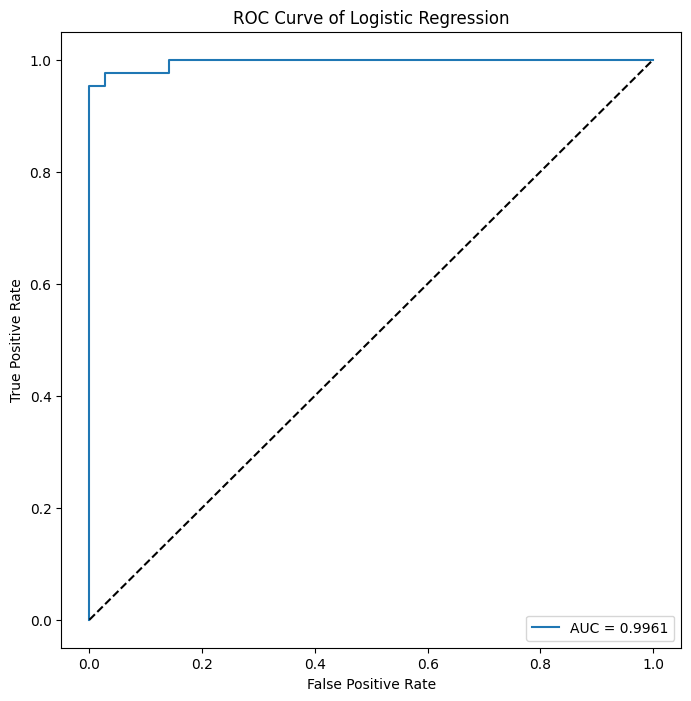

In [188]:
# ROC 커브 시각화
y_scores = best_lr_model.decision_function(test_input)
fpr, tpr, thresholds = roc_curve(test_target, y_scores)
roc_auc = roc_auc_score(test_target, y_scores)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [189]:
# 각 특성의 중요도를 기준으로 내림차순 정렬하여 상위 5개의 특성을 선택
top_features_indices = feature_importances.argsort()[::-1][:5]

# 상위 5개 특성의 이름 출력
top_features_names = train_data.columns[top_features_indices]
print("상위 5개의 중요한 특성:")
for feature_name in top_features_names:
    print(feature_name)

상위 5개의 중요한 특성:
radius_se
concave points_mean
symmetry_worst
concavity_worst
texture_worst


In [190]:
# 예측값 생성
train_pred = best_lr_model.predict(train_input)
test_pred = best_lr_model.predict(test_input)

# True Positive, True Negative, False Positive, False Negative 계산
def calculate_confusion_matrix(true, pred):
    true_positive = sum((true == 1) & (pred == 1))
    true_negative = sum((true == 0) & (pred == 0))
    false_positive = sum((true == 0) & (pred == 1))
    false_negative = sum((true == 1) & (pred == 0))
    return true_positive, true_negative, false_positive, false_negative

# 훈련 세트에 적용
train_tp, train_tn, train_fp, train_fn = calculate_confusion_matrix(train_target, train_pred)

# 테스트 세트에 적용
test_tp, test_tn, test_fp, test_fn = calculate_confusion_matrix(test_target, test_pred)

# 민감도(recall), 특이도, 정밀도, 정확도, F1 Score 계산
sensitivity_train = train_tp / (train_tp + train_fn)
specificity_train = train_tn / (train_tn + train_fp)
precision_train = train_tp / (train_tp + train_fp)
accuracy_train = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
f1_train = (2 * precision_train * sensitivity_train) / (precision_train + sensitivity_train)

sensitivity_test = test_tp / (test_tp + test_fn)
specificity_test = test_tn / (test_tn + test_fp)
precision_test = test_tp / (test_tp + test_fp)
accuracy_test = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
f1_test = (2 * precision_test * sensitivity_test) / (precision_test + sensitivity_test)

# 결과 출력
print(f"훈련 세트 - 민감도: {sensitivity_train:.3f}, 특이도: {specificity_train:.3f}, 정밀도: {precision_train:.3f}, 정확도: {accuracy_train:.3f}, F1 Score: {f1_train:.3f}")
print(f"테스트 세트 - 민감도: {sensitivity_test:.3f}, 특이도: {specificity_test:.3f}, 정밀도: {precision_test:.3f}, 정확도: {accuracy_test:.3f}, F1 Score: {f1_test:.3f}")

훈련 세트 - 민감도: 0.982, 특이도: 0.993, 정밀도: 0.988, 정확도: 0.989, F1 Score: 0.985
테스트 세트 - 민감도: 0.977, 특이도: 0.972, 정밀도: 0.955, 정확도: 0.974, F1 Score: 0.966


##XG 부스트

In [191]:
from xgboost import XGBClassifier

# XGBoost 모델 생성
xgboost = XGBClassifier(random_state=42)

# 그리드 서치를 사용하여 최적의 파라미터 찾기
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1,2,3, 4, 5,6,7,8,9,10],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb_search = GridSearchCV(xgboost, param_grid, cv=5)
grid_xgb_search.fit(train_input, train_target)

# 최적의 모델을 사용하여 예측
best_xgb_model = grid_xgb_search.best_estimator_
train_accuracy = best_xgb_model.score(train_input, train_target)
test_accuracy = best_xgb_model.score(test_input, test_target)

# 교차 검증을 통한 정확도 평균 계산
cv_scores = cross_val_score(best_xgb_model, train_input, train_target, cv=5)
cv_accuracy_mean = cv_scores.mean()

# 최적의 파라미터
best_params = grid_xgb_search.best_params_

# 특성 중요도
feature_importances = best_xgb_model.feature_importances_

# 결과 출력
print(f"학습 세트 정확도: {train_accuracy:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"교차 검증 정확도 평균: {cv_accuracy_mean:.4f}")
print(f"최적의 파라미터: {best_params}")
print(f"특성 중요도: {feature_importances}")

학습 세트 정확도: 1.0000
테스트 세트 정확도: 0.9649
교차 검증 정확도 평균: 0.9758
최적의 파라미터: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 300}
특성 중요도: [0.         0.01509429 0.         0.00882335 0.00601055 0.00375727
 0.         0.08549784 0.00880544 0.00740429 0.01049236 0.
 0.01347247 0.01403251 0.00164951 0.00632224 0.         0.00175783
 0.00349976 0.00148638 0.06805924 0.03033433 0.23923944 0.13420595
 0.00821972 0.         0.01435007 0.30872685 0.00776676 0.00099158]


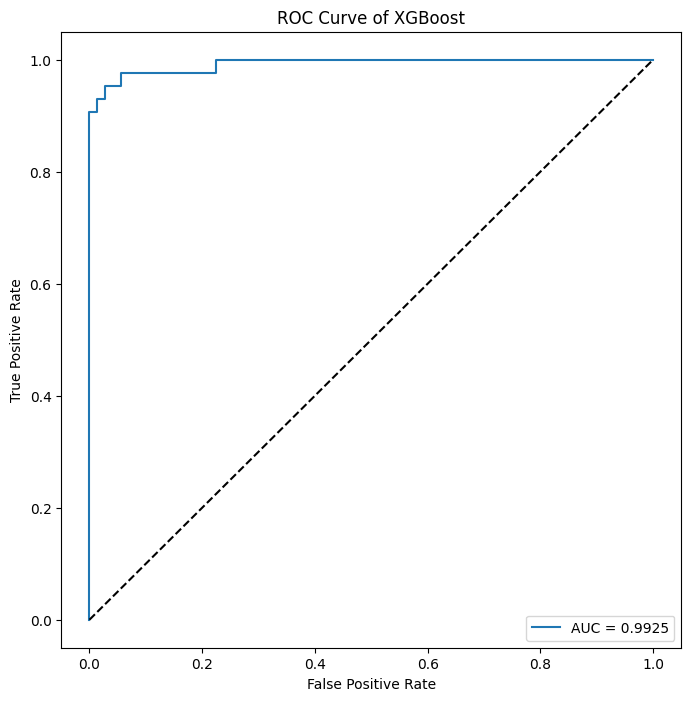

In [192]:
# ROC 커브 시각화
y_scores = best_xgb_model.predict_proba(test_input)[:, 1]
fpr, tpr, thresholds = roc_curve(test_target, y_scores)
roc_auc = roc_auc_score(test_target, y_scores)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.legend(loc='lower right')
plt.show()

In [193]:
# 각 특성의 중요도를 기준으로 내림차순 정렬하여 상위 5개의 특성을 선택
top_features_indices = feature_importances.argsort()[::-1][:5]

# 상위 5개 특성의 이름 출력
top_features_names = train_data.columns[top_features_indices]
print("상위 5개의 중요한 특성:")
for feature_name in top_features_names:
    print(feature_name)

상위 5개의 중요한 특성:
concave points_worst
perimeter_worst
area_worst
concave points_mean
radius_worst


In [194]:
# 예측값 생성
train_pred = best_xgb_model.predict(train_input)
test_pred = best_xgb_model.predict(test_input)

# True Positive, True Negative, False Positive, False Negative 계산
def calculate_confusion_matrix(true, pred):
    true_positive = sum((true == 1) & (pred == 1))
    true_negative = sum((true == 0) & (pred == 0))
    false_positive = sum((true == 0) & (pred == 1))
    false_negative = sum((true == 1) & (pred == 0))
    return true_positive, true_negative, false_positive, false_negative

# 훈련 세트에 적용
train_tp, train_tn, train_fp, train_fn = calculate_confusion_matrix(train_target, train_pred)

# 테스트 세트에 적용
test_tp, test_tn, test_fp, test_fn = calculate_confusion_matrix(test_target, test_pred)

# 민감도(recall), 특이도, 정밀도, 정확도, F1 Score 계산
sensitivity_train = train_tp / (train_tp + train_fn)
specificity_train = train_tn / (train_tn + train_fp)
precision_train = train_tp / (train_tp + train_fp)
accuracy_train = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
f1_train = (2 * precision_train * sensitivity_train) / (precision_train + sensitivity_train)

sensitivity_test = test_tp / (test_tp + test_fn)
specificity_test = test_tn / (test_tn + test_fp)
precision_test = test_tp / (test_tp + test_fp)
accuracy_test = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
f1_test = (2 * precision_test * sensitivity_test) / (precision_test + sensitivity_test)

# 결과 출력
print(f"훈련 세트 - 민감도: {sensitivity_train:.3f}, 특이도: {specificity_train:.3f}, 정밀도: {precision_train:.3f}, 정확도: {accuracy_train:.3f}, F1 Score: {f1_train:.3f}")
print(f"테스트 세트 - 민감도: {sensitivity_test:.3f}, 특이도: {specificity_test:.3f}, 정밀도: {precision_test:.3f}, 정확도: {accuracy_test:.3f}, F1 Score: {f1_test:.3f}")

훈련 세트 - 민감도: 1.000, 특이도: 1.000, 정밀도: 1.000, 정확도: 1.000, F1 Score: 1.000
테스트 세트 - 민감도: 0.953, 특이도: 0.972, 정밀도: 0.953, 정확도: 0.965, F1 Score: 0.953


### 논문용 roc 그래프(합친거)

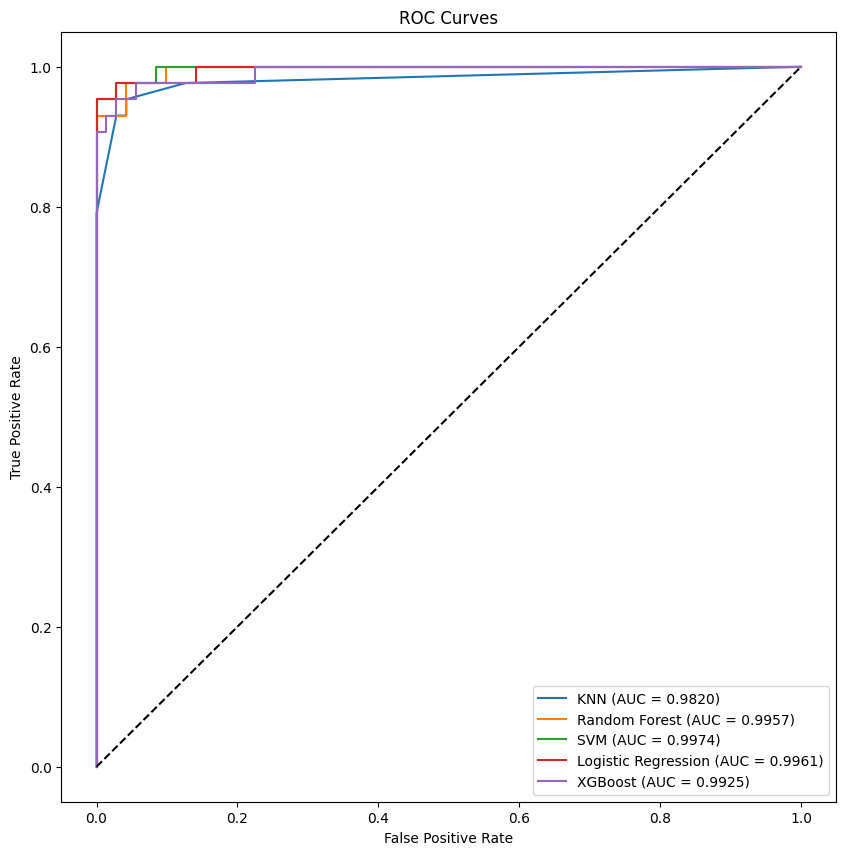

In [196]:
# KNN ROC Curve
y_scores_knn = best_kn_model.predict_proba(test_input)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_target, y_scores_knn)
roc_auc_knn = roc_auc_score(test_target, y_scores_knn)

# 랜덤 포레스트 ROC Curve
y_scores_rf = best_rf_model.predict_proba(test_input)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_target, y_scores_rf)
roc_auc_rf = roc_auc_score(test_target, y_scores_rf)

# SVM ROC Curve
y_scores_svm = best_svm_model.predict_proba(test_input)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_target, y_scores_svm)
roc_auc_svm = roc_auc_score(test_target, y_scores_svm)

# 로지스틱 회귀 ROC Curve
y_scores_lr = best_lr_model.predict_proba(test_input)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_target, y_scores_lr)
roc_auc_lr = roc_auc_score(test_target, y_scores_lr)

# XGBoost ROC Curve
y_scores_xgb = best_xgb_model.predict_proba(test_input)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(test_target, y_scores_xgb)
roc_auc_xgb = roc_auc_score(test_target, y_scores_xgb)

# ROC 커브 시각화
plt.figure(figsize=(10, 10))

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()